In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Data Loading and Filtering

In [2]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
del df['MemberName'], df['CourseName']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CapstoneScore
0,3,79.9,43.7,2,0,62.8,5.0,45.3
1,2,76.8,95.6,6,0,87.4,2.7,78.8
2,3,96.6,75.9,8,0,98.4,2.8,65.4
4,2,83.2,24.0,6,0,41.8,4.2,40.1
7,3,86.5,88.0,5,0,23.9,1.3,68.2


In [3]:
Y = df['CapstoneScore'].values
X_df = df.drop(columns=['CapstoneScore'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X = X_standardized.values

In [4]:
X = np.column_stack((
    np.ones(len(df)),
    X
))

#### Compute Cost

In [5]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

#### Optimization

In [6]:
cost_history=[]
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


#### Checking

In [7]:
beta = np.random.randn(8)
n_iter = 1000
lr = 0.01

In [8]:
beta = gradient_descent(X,Y,beta,n_iter,lr)

iteration: 0, beta:[ 1.3333209   0.83619546 -0.26546444  0.18785884  1.15103927 -0.78109416
 -0.37590102  2.21983754], cost:1583.1458571628261
iteration: 100, beta:[35.42493963 -0.23951684  0.24980619 10.01988695  1.56486191 -1.03063173
  0.62248379  2.02855453], cost:222.6022008092831
iteration: 200, beta:[47.90357465 -0.34303095  0.50045141 13.68938003  0.96923117 -0.58624135
  0.76627999  1.92622439], cost:39.76662671580425
iteration: 300, beta:[52.47115864 -0.32206843  0.62338878 15.14585593  0.46638185 -0.20977865
  0.80940798  1.82067048], cost:14.610146552860305
iteration: 400, beta:[ 5.41430421e+01 -3.11714007e-01  6.85138730e-01  1.57526342e+01
  1.57548883e-01  2.66079874e-02  8.50739221e-01  1.73718990e+00], cost:11.042729647534445
iteration: 500, beta:[ 5.47550055e+01 -3.16048717e-01  7.16549208e-01  1.60150797e+01
 -1.58715145e-02  1.63024014e-01  8.89349302e-01  1.68231236e+00], cost:10.511313728772484
iteration: 600, beta:[54.97900393 -0.3255597   0.73248938 16.13201185 

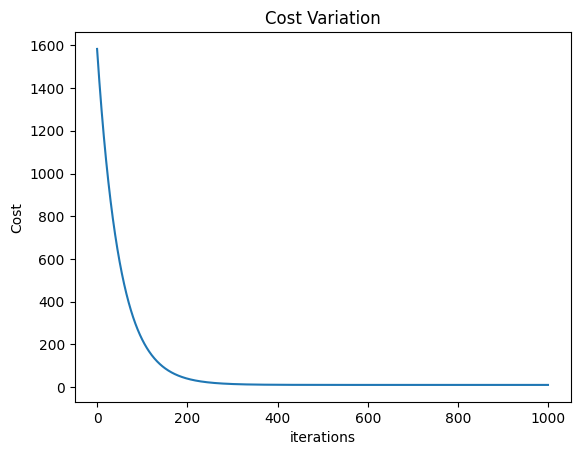

In [9]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Model Evaluation

In [10]:
Y_hat = X.dot(beta) 
Y_hat

array([49.96746194, 79.29091663, 68.47954612, 36.57110492, 71.0568104 ,
       82.29981127, 38.24533198, 56.22344383, 48.82367059, 45.57556704,
       59.96267538, 36.71622247, 39.52392938, 49.96504456, 56.82374266,
       30.84211438, 83.74032877, 29.00025924, 52.49314469, 75.82730864,
       64.95040543, 42.13345912, 34.6374272 , 79.92145984, 79.33276118,
       36.87368335, 44.72448613, 43.11837736, 49.58508076, 38.67682542,
       78.4948693 , 39.96145296, 28.17684223, 61.4397985 , 65.9339872 ,
       68.14947481, 29.38453933, 42.32826992, 32.5858024 , 61.16220299,
       62.67658983, 70.36564591, 56.33375885, 70.29161632, 54.5781719 ,
       57.15294049, 51.88503144, 32.89990213, 59.57704903, 43.66872964,
       77.67924741, 39.47060795, 50.90551756, 76.60679849, 60.55876862,
       78.90220462, 75.19683642, 58.44631146, 70.87751481, 72.62612343,
       26.9037889 , 51.79922825, 47.81762829, 79.69261455, 44.56716137,
       56.54618774, 67.40672499, 47.79995097, 82.4430563 , 42.93

In [11]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

def RMSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.sqrt(np.mean((Y - Y_hat) ** 2))

In [12]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)
rmse = RMSE(Y,Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")
print(f"RMSE : {rmse}")

MSE : 20.810611862446304
MAE : 3.538051562232816
R2 Score : 0.9271665633767384
RMSE : 4.561864954428868


#### SkLeatn Implementation

In [13]:
lr_model = LinearRegression()
lr_model.fit(X[:, 1:], Y)  # skip the intercept column since sklearn adds it internally

print("Sklearn coefficients:", lr_model.coef_)
print("Sklearn intercept:", lr_model.intercept_)

Sklearn coefficients: [-0.35523215  0.7477395  16.23362197 -0.22249773  0.33544015  0.97752925
  1.61270231]
Sklearn intercept: 55.10833333333334
